In [44]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# imports
from utils import *
from models import *

In [2]:
loaded_train = load_pickle("../dataframes/app_train_preprocessed.pickle")
loaded_test = load_pickle("../dataframes/app_test_preprocessed.pickle")

train_Y = loaded_train['TARGET'].values
loaded_train.drop(columns=['TARGET', 'SK_ID_CURR'], inplace=True)
loaded_test.drop(columns=['SK_ID_CURR'], inplace=True)

# convert from dataframes to arrays
train_X = loaded_train.values
test_X = loaded_test.values

Text(0, 0.5, 'Count')

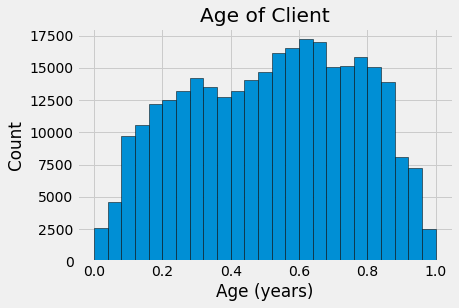

In [4]:
plt.style.use('fivethirtyeight')

# print(loaded_train['DAYS_BIRTH'])

plt.hist(loaded_train['DAYS_BIRTH'], edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [5]:
app_train = load_app_training_data()
app_test = load_test_data()

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


Text(0, 0.5, 'Count')

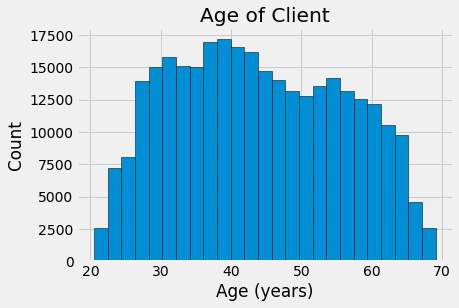

In [13]:
plt.style.use('fivethirtyeight')

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# print(app_train['DAYS_BIRTH'])

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [15]:
# do basic pre-processing
def pre_process(train_data, test_data):
#     train_data, test_data = encode_binary_cols(train_data, test_data) # purposefully left out - was taking too long
    train_data, test_data = one_hot_encode(train_data, test_data)
    train_data, test_data = align_data(train_data, test_data)
    train_data, test_data = remove_days_employed_anomaly(train_data, test_data)
    
    train_data, test_data = remove_missing_cols(train_data, test_data, thr=0.90)
    
    train_data.drop(columns=['TARGET', 'SK_ID_CURR'],inplace=True)
    test_data.drop(columns=['SK_ID_CURR'], inplace= True)
    train_data, test_data = mean_imputation(train_data, test_data)

    return train_data, test_data

train_data, test_data = pre_process(app_train.copy(), app_test.copy())

AFTER ONE HOT ENCODING
Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)
AFTER ALIGNMENT:
Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)
Test data contain 9274 anomalies out of 48744 rows
Removing columns with 0.9 proportion of missing values
AFTER REMOVING MISSING COLS (and aligning):
Training Features shape:  (307511, 244)
Testing Features shape:  (48744, 243)
AFTER MEAN IMPUTATION:
Training data shape:  (307511, 242)
Testing data shape:  (48744, 242)


In [16]:
# convert from dataframes to arrays
train_X = train_data.values
test_X = test_data.values

In [38]:
model, predictions = baseline_log_reg(train_X, train_Y, test_X, save_path=None, C=0.0001) # don't save model as save_path=None
# create_and_save_submission(test_ids, predictions, "../test_predictions/filename.csv") # Add filename

Function to see the type of the loans taken and on a seperate plot see the percent of the loans with TARGET value 1 (not return loan).

In [41]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})
    # Calculate the percentage of target=1 per category value
    category_percentage = app_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    category_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
        
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y = "Number of contracts", data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=category_percentage[feature], data = category_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel("Percent of target with value 1 [%]", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show();

In [42]:
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 1]
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    
    for feature in var:
        i += 1
        plt.subplot(2, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        
    plt.show();

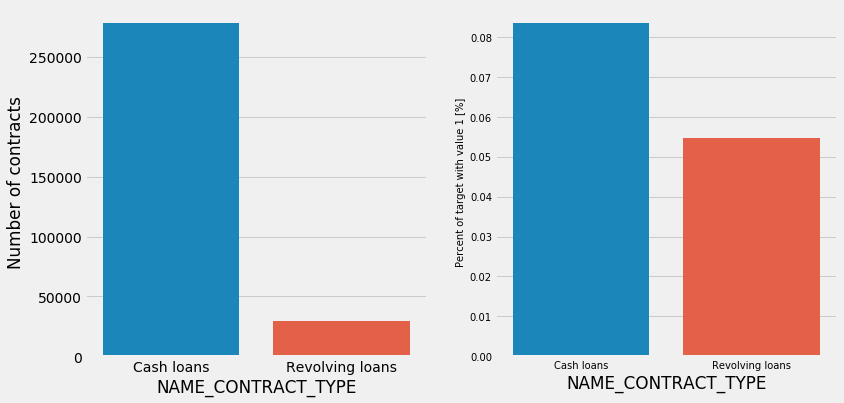

In [45]:
plot_stats('NAME_CONTRACT_TYPE')